In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import scipy.stats as ss
import seaborn as sns
from itertools import product

advertising_df = pd.read_csv("../../data/Advertising.csv", index_col=0)
y_var = 'sales'
advertising_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Base Model

In [40]:
model = ols(f"{y_var} ~ TV + radio + newspaper", data=advertising_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        11:39:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Doesn't look like newspaper is a good predictor, let's look at a correlation matrix

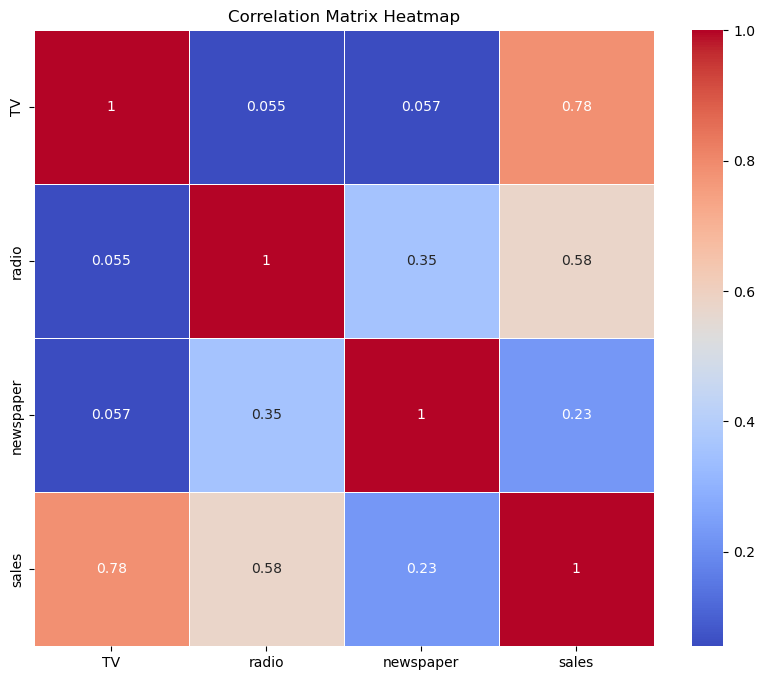

In [4]:
corr_matrix = advertising_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Extract the design matrix (X)
X = results.model.exog

# Compute VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = results.model.exog_names
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print VIF data
print(vif_data)

     feature       VIF
0  Intercept  6.848900
1         TV  1.004611
2      radio  1.144952
3  newspaper  1.145187


## Collinearity
* newspaper may be causing an inflation in the standard error of the coefficients fit
* we call this *collinearity*
* remember that $t = \frac{\hat{\beta} - 0}{SE\left(\hat{\beta} \right)}$, therefore an increase in the standard error, results in a decrease of the $t$ statistic
* the implication thererefore is that we may fail to reject the null hypothesis when we shouldn't -- put this into alternative words
* we can test for multicollinearity with the `variance_inflation_factor()` function, by looking at correlations, and by reasoning

## so, what happens if we remove newspaper?
* $R^2$ doesn't change (though it will probably go down)
* stadard error of coefficient on radio is reduced

In [5]:
model = ols(f"{y_var} ~ TV + radio", data=advertising_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           4.83e-98
Time:                        11:03:05   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interaction effects
* we've talked about this previously, but not formally defined it
* what happens if one of our predictors alters the *effectiveness* of one or more of the other predictors?
* we call this an interaction effect
* interaction effects should be combined with their *main effects*

In [6]:
model = ols(f"{y_var} ~ TV * radio", data=advertising_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          6.68e-146
Time:                        11:03:05   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Polynomial effects
* we've also discussed polynomial effects
* each degree of a polynomial adds another ``curve'' to the line

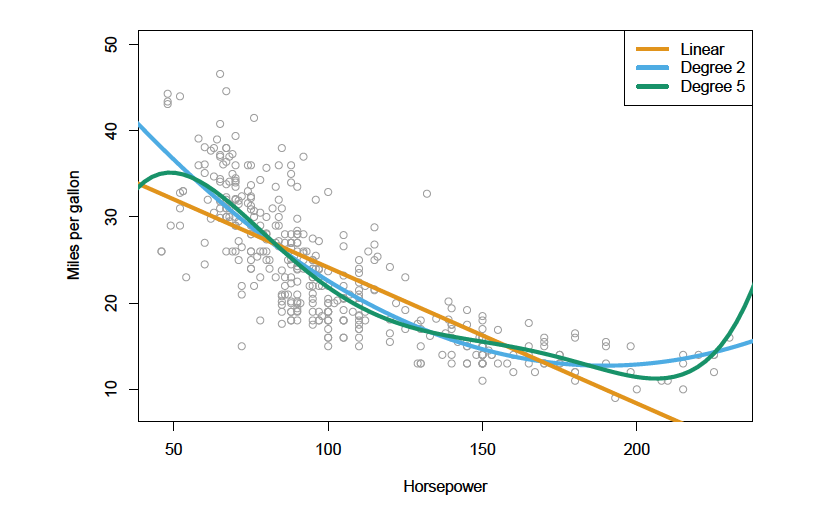

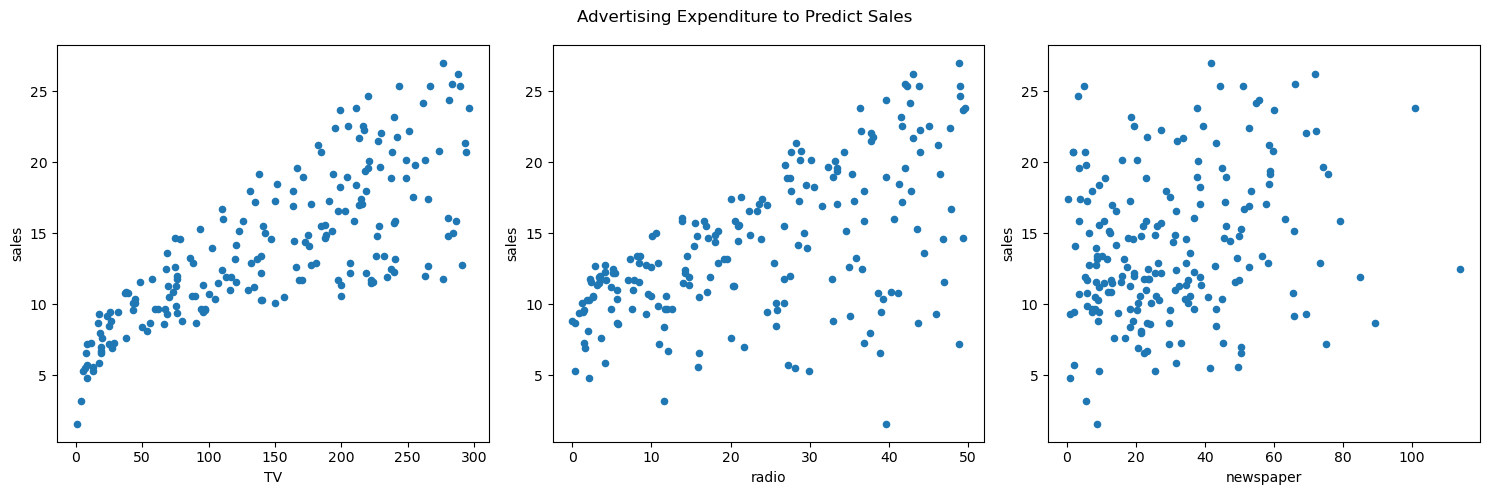

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for (i, col) in enumerate(['TV', 'radio', 'newspaper']):
    advertising_df.plot.scatter(x=col, y='sales', ax=ax[i])
fig.suptitle('Advertising Expenditure to Predict Sales')
plt.tight_layout()

In [14]:
model = ols(f"{y_var} ~ TV * radio + I(TV**2)", data=advertising_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3432.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          1.79e-179
Time:                        11:06:49   Log-Likelihood:                -186.86
No. Observations:                 200   AIC:                             383.7
Df Residuals:                     195   BIC:                             400.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1371      0.193     26.663      0.000       4.757       5.517
TV             0.0509      0.002     22.810      0.000       0.047       0.055
radio          0.0352      0.006      5.959      0.000       0.024       0.047
TV:radio       0.0011   3.47e-05     31.061      0.000       0.001       0.001
I(TV ** 2)    -0.0001   6.89e-06    -15.920      0.000      -0.000   -9.61e-05
==============================================================================
Omnibus:                      169.759   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4031.167
Skew:                          -2.988   Prob(JB):                         0.00
Kurtosis:                      24.166   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual plots
* residual plots allow us to check for several considerations in the regression model
* First, the error assumptions of the model $y \sim \beta X + \epsilon$:
    * Error terms are uncorrelated and have a constant variance, e.g. $\epsilon \sim N(0, \sigma)$

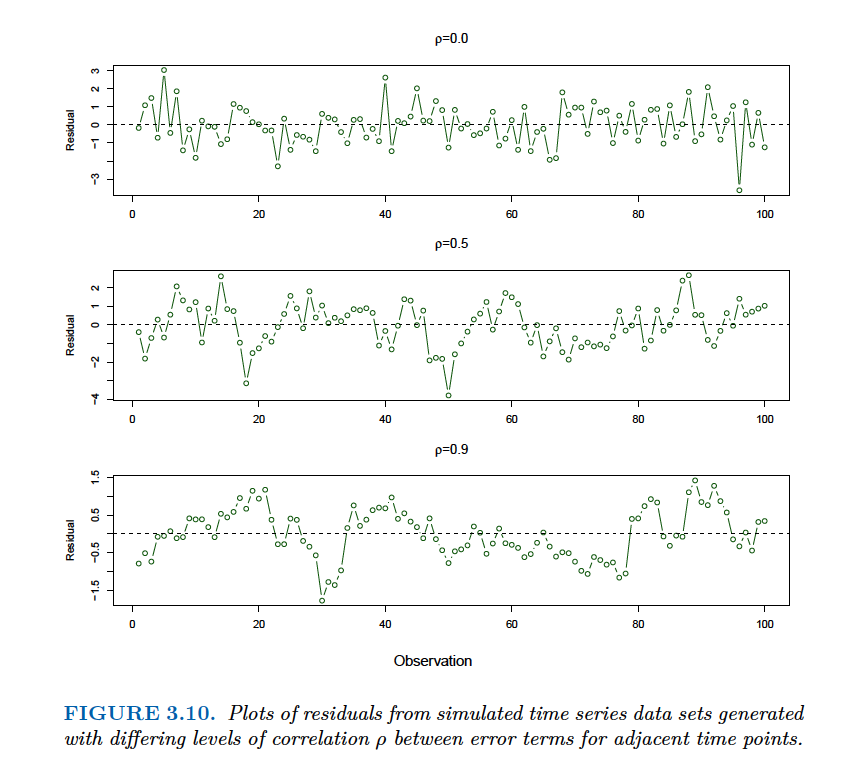

In [16]:
def get_residual_fitted_plot(results):
    ax = plt.subplots(figsize=(8,8))[1]
    ax.scatter(results.fittedvalues, results.resid)
    ax.set_xlabel('Fitted value')
    ax.set_ylabel('Residual')
    ax.axhline(0, c='k', ls='--')

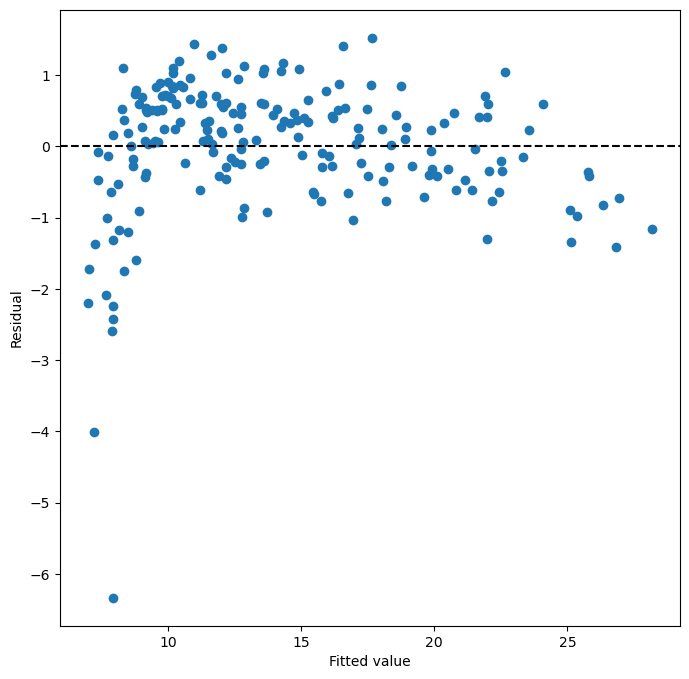

In [17]:
model = ols(f"{y_var} ~ TV * radio", data=advertising_df)
results = model.fit()
get_residual_fitted_plot(results)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3432.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          1.79e-179
Time:                        11:41:48   Log-Likelihood:                -186.86
No. Observations:                 200   AIC:                             383.7
Df Residuals:                     195   BIC:                             400.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1371      0.193     26.663      0.000       4.757       5.517
TV             0.0509      0.002     22.810      0.000       0.047       0.055
radio          0.0352      0.006      5.959      0.000       0.024       0.047
TV:radio       0.0011   3.47e-05     31.061      0.000       0.001       0.001
I(TV ** 2)    -0.0001   6.89e-06    -15.920      0.000      -0.000   -9.61e-05
==============================================================================
Omnibus:                      169.759   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4031.167
Skew:                          -2.988   Prob(JB):                         0.00
Kurtosis:                      24.166   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

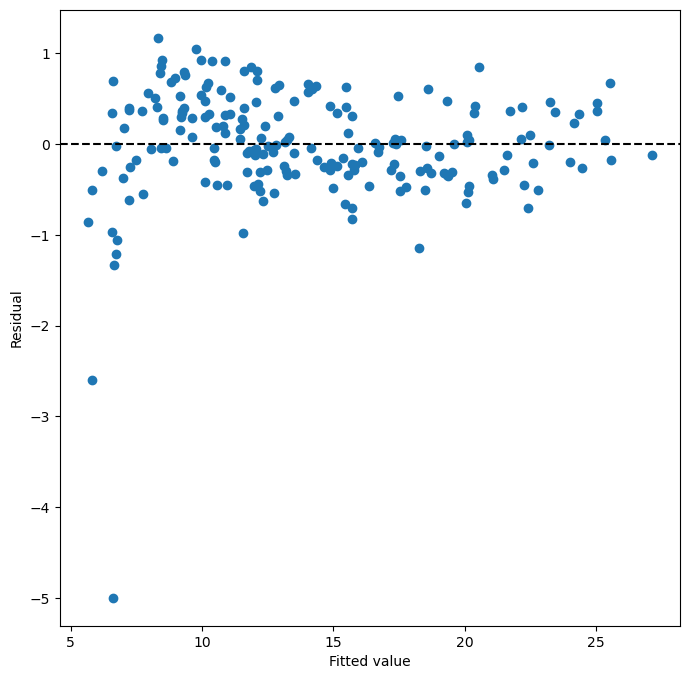

In [43]:
model = ols(f"{y_var} ~ TV * radio + I(TV**2)", data=advertising_df)
results = model.fit()
get_residual_fitted_plot(results)
results.summary()

### We can see from the above plots that some non-linearity exists in the data and that the polynomial term seems to fix some of the issues in our model. We still seem to have an issue with non-constant variance (see higher variance of residuals on lower fitted values) and some non-linearity, especially seen in lower fitted values.

## Outliers and High leverage points
* Outliers are points that have an expected predictor (X) value but an unexpected predicted (Y) value, i.e. the response is unusual given the predictor.
    * Regression is relatively robust to outliers.
* High leverage points have an unexpected predictor (X) value and an unexpected predicted (Y).  
    * Regression is not robust to high leverage points.

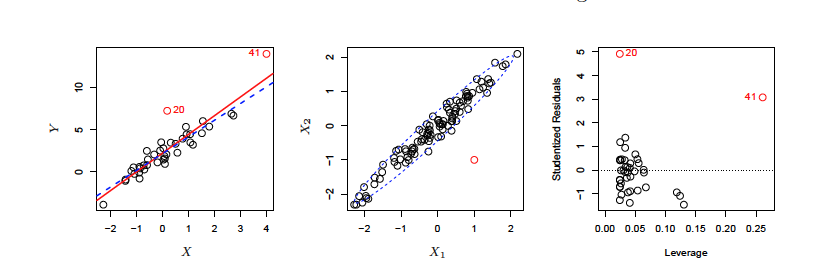

In [45]:
temp = advertising_df.copy(deep=True)
temp['prediction'] = results.predict(advertising_df[['TV', 'radio']])
temp['studentized residuals'] = (results.resid / results.resid.std()).abs()
temp = temp.sort_values('studentized residuals', ascending=False).reset_index(drop=True)
temp

,TV,radio,newspaper,sales,prediction,studentized residuals
0,0.7,39.6,8.7,1.6,6.594925,8.089430
1,4.1,11.6,5.7,3.2,5.803077,4.215762
2,5.4,29.9,9.4,5.3,6.634015,2.160477
3,7.3,28.1,41.4,5.5,6.711838,1.962609
4,31.5,24.6,2.2,9.5,8.331415,1.892559
...,...,...,...,...,...,...
195,177.0,9.3,6.4,12.8,12.810980,0.017783
196,149.7,35.6,6.0,17.3,17.289809,0.016504
197,202.5,22.3,31.6,16.6,16.594017,0.009689
198,166.8,42.0,3.6,19.6,19.596326,0.005951


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6248.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          4.72e-202
Time:                        11:41:03   Log-Likelihood:                -119.01
No. Observations:                 197   AIC:                             248.0
Df Residuals:                     192   BIC:                             264.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4236      0.143     38.033      0.000       5.142       5.705
TV             0.0462      0.002     27.805      0.000       0.043       0.049
radio          0.0400      0.004      9.262      0.000       0.032       0.049
TV:radio       0.0011   2.53e-05     41.598      0.000       0.001       0.001
I(TV ** 2) -9.455e-05   5.11e-06    -18.516      0.000      -0.000   -8.45e-05
==============================================================================
Omnibus:                       13.387   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.804
Skew:                          -0.552   Prob(JB):                     0.000610
Kurtosis:                       3.763   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

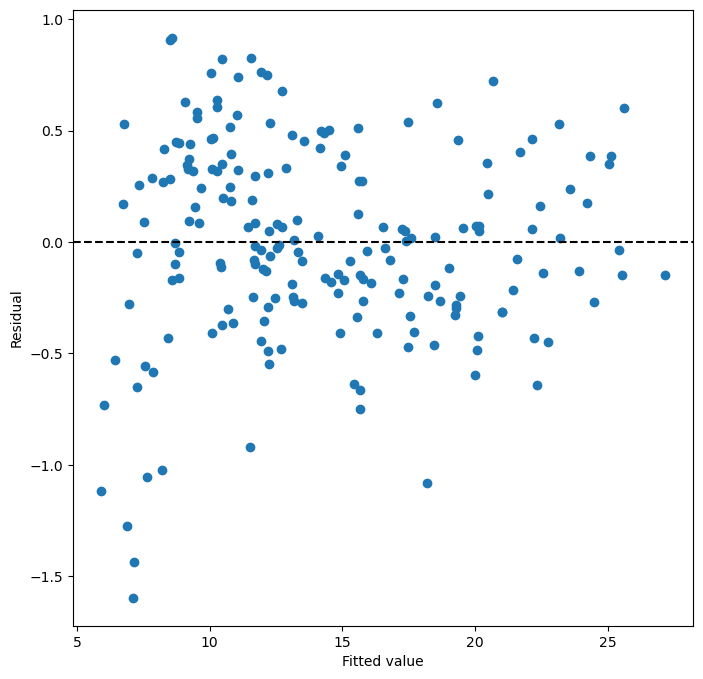

In [42]:
model = ols(f"{y_var} ~ TV * radio + I(TV**2)", data=temp.iloc[3:])
results = model.fit()
get_residual_fitted_plot(results)
results.summary()

## although removing these data points does increase our fit, we must still ask, "are these true outliers, or was our original model just deficient?" In this case, we can't check the collection of data, and might err on the side of saying our original model was deficient (might need more non-linear terms, etc.)

## how can we measure leaverage?

In [52]:
model = ols(f"{y_var} ~ TV * radio + I(TV**2)", data=temp)
results = model.fit()

# Get influence measures
influence = results.get_influence()

# Extract leverage values
leverage = influence.hat_matrix_diag

# Print leverage values
temp['leverage'] = leverage
temp

,TV,radio,newspaper,sales,prediction,studentized residuals,leverage
0,0.7,39.6,8.7,1.6,6.594925,8.089430,0.060875
1,4.1,11.6,5.7,3.2,5.803077,4.215762,0.051271
2,5.4,29.9,9.4,5.3,6.634015,2.160477,0.038280
3,7.3,28.1,41.4,5.5,6.711838,1.962609,0.035055
4,31.5,24.6,2.2,9.5,8.331415,1.892559,0.017577
...,...,...,...,...,...,...,...
195,177.0,9.3,6.4,12.8,12.810980,0.017783,0.015069
196,149.7,35.6,6.0,17.3,17.289809,0.016504,0.016017
197,202.5,22.3,31.6,16.6,16.594017,0.009689,0.009103
198,166.8,42.0,3.6,19.6,19.596326,0.005951,0.020480


In [53]:
temp.sort_values('leverage', ascending=False)

,TV,radio,newspaper,sales,prediction,studentized residuals,leverage
26,290.7,4.1,8.5,12.8,12.092801,1.145330,0.083501
47,8.7,48.9,75.0,7.2,7.749222,0.889481,0.081862
58,13.1,0.4,25.6,5.3,5.804992,0.817849,0.073427
14,8.6,2.1,1.0,4.8,5.660145,1.393030,0.073363
160,276.9,48.9,41.8,27.0,27.119517,0.193561,0.070989
...,...,...,...,...,...,...,...
168,197.6,23.3,14.2,16.6,16.689920,0.145629,0.009241
197,202.5,22.3,31.6,16.6,16.594017,0.009689,0.009103
137,215.4,23.6,57.6,17.1,17.316156,0.350071,0.008863
199,214.7,24.0,4.0,17.4,17.402291,0.003710,0.008840


## Qualitative Predictors

In [1]:
import pandas as pd
credit_df = pd.read_csv("../../data/Credit.csv")
y_var = 'Balance'
credit_df.head()

In [ ]:
credit_df.Region.unique()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     354.4
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          5.89e-174
Time:                        12:13:22   Log-Likelihood:                -2597.3
No. Observations:                 400   AIC:                             5213.
Df Residuals:                     391   BIC:                             5249.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -489.5170     57.669     -8.488      0.000    -602.897    -376.137
Region_South[T.True]     3.0407     19.921      0.153      0.879     -36.125      42.206
Region_West[T.True]     26.6530     22.918      1.163      0.246     -18.405      71.711
Income                  -7.5713      0.383    -19.783      0.000      -8.324      -6.819
Limit                    0.1220      0.053      2.296      0.022       0.018       0.226
Rating                   2.1250      0.796      2.670      0.008       0.560       3.690
Cards                   11.2069      7.075      1.584      0.114      -2.703      25.116
Age                     -0.8514      0.479     -1.776      0.077      -1.794       0.091
Education                1.9185      2.602      0.737      0.461      -3.198       7.035
==============================================================================
Omnibus:                       95.456   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.246
Skew:                           1.387   Prob(JB):                     4.82e-37
Kurtosis:                       4.530   Cond. No.                     3.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

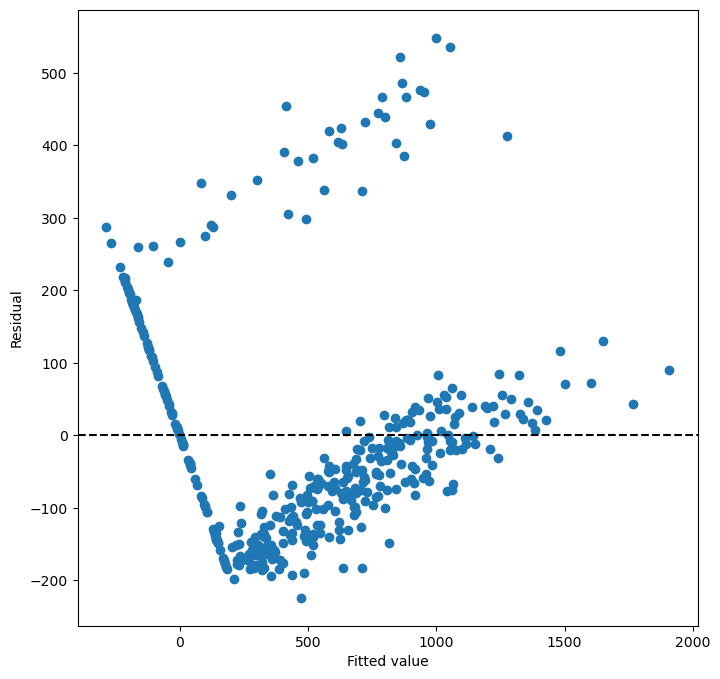

In [73]:
credit_df['Region_South'] = credit_df['Region'] == 'South'
credit_df['Region_West'] = credit_df['Region'] == 'West'

model = ols(f"{y_var} ~ Income + Limit + Rating + Cards + Age + Education + Region_South + Region_West", data=credit_df)
results = model.fit()
get_residual_fitted_plot(results)
results.summary()

In [ ]:
for col in ['Married', 'Own', 'Student']:
    credit_df[col] = credit_df[col] == 'Yes'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     815.7
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          5.43e-254
Time:                        12:13:44   Log-Likelihood:                -2401.4
No. Observations:                 400   AIC:                             4825.
Df Residuals:                     389   BIC:                             4869.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -448.9472     33.487    -13.407      0.000    -514.785    -383.109
Married[T.True]         -5.9068     10.358     -0.570      0.569     -26.272      14.458
Own[T.True]            -10.5465      9.969     -1.058      0.291     -30.147       9.054
Student[T.True]        429.3167     16.744     25.639      0.000     396.396     462.238
Region_South[T.True]     9.8899     12.278      0.806      0.421     -14.249      34.029
Region_West[T.True]     14.7248     14.169      1.039      0.299     -13.133      42.583
Income                  -7.7682      0.235    -33.049      0.000      -8.230      -7.306
Limit                    0.2664      0.004     75.100      0.000       0.259       0.273
Cards                   23.2658      3.642      6.388      0.000      16.106      30.426
Age                     -0.6079      0.296     -2.056      0.040      -1.189      -0.027
Education               -1.3847      1.602     -0.864      0.388      -4.535       1.765
==============================================================================
Omnibus:                       39.489   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.373
Skew:                           0.831   Prob(JB):                     3.13e-11
Kurtosis:                       3.374   Cond. No.                     3.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

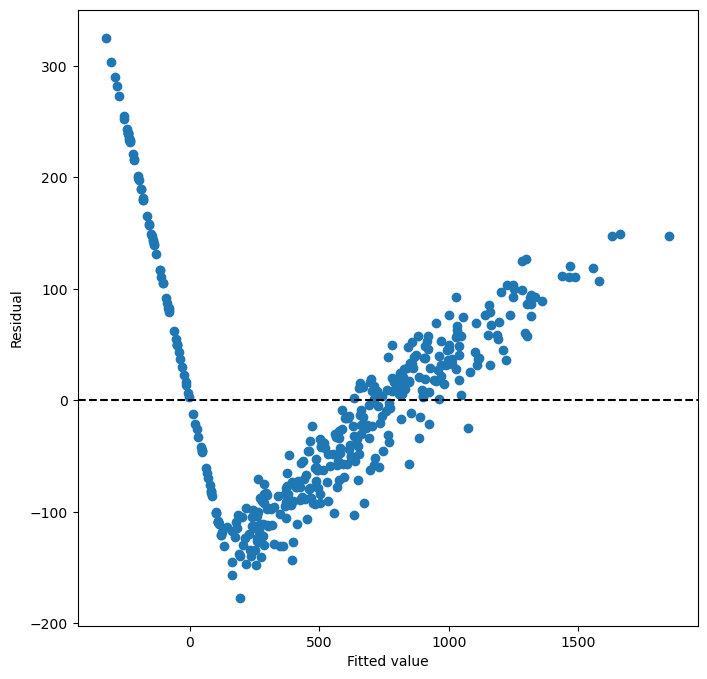

In [76]:
model = ols(f"{y_var} ~ Income + Rating + Limit + Cards + Age + Education + Married + Own + Student + Region_South + Region_West", data=credit_df)
results = model.fit()
get_residual_fitted_plot(results)
results.summary()

In [80]:
credit_df['pred'] = results.predict(credit_df[[x for x in credit_df.columns if x != y_var]])
credit_df['resid'] = results.resid
credit_df.sort_values('resid', ascending=False)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Region_South,Region_West,pred,resid
241,15.602,906,103,2,36,11,False,False,True,East,0,False,False,-325.318557,325.318557
120,27.241,1402,128,2,67,15,True,False,True,West,0,False,True,-303.824819,303.824819
337,12.414,855,119,3,32,12,False,False,True,East,0,False,False,-289.825100,289.825100
95,14.084,855,120,5,46,17,True,False,True,East,0,False,False,-282.246672,282.246672
345,30.012,1511,137,2,33,17,False,False,True,South,0,True,False,-272.707414,272.707414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,20.918,1233,128,3,47,18,True,True,True,West,16,False,True,160.865320,-144.865320
306,45.120,3762,287,3,80,8,False,False,True,South,70,True,False,216.655468,-146.655468
172,76.348,4697,344,4,60,18,False,False,False,West,108,False,True,255.431739,-147.431739
320,16.279,1160,126,3,78,13,False,True,True,East,5,False,False,161.358803,-156.358803


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.726e+04
Date:                Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:16:15   Log-Likelihood:                -1165.6
No. Observations:                 310   AIC:                             2353.
Df Residuals:                     299   BIC:                             2394.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -700.2736      4.223   -165.834      0.000    -708.584    -691.964
Married[T.True]         -2.3998      1.263     -1.900      0.058      -4.886       0.086
Own[T.True]              0.1597      1.210      0.132      0.895      -2.221       2.541
Student[T.True]        500.2986      1.882    265.843      0.000     496.595     504.002
Region_South[T.True]    -0.1276      1.478     -0.086      0.931      -3.037       2.782
Region_West[T.True]     -1.2354      1.744     -0.708      0.479      -4.667       2.196
Income                  -9.9916      0.030   -336.712      0.000     -10.050      -9.933
Limit                    0.3264      0.001    600.016      0.000       0.325       0.328
Cards                   24.8222      0.425     58.472      0.000      23.987      25.658
Age                     -1.0064      0.036    -28.107      0.000      -1.077      -0.936
Education                0.0289      0.190      0.152      0.879      -0.346       0.404
==============================================================================
Omnibus:                        5.212   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.335
Skew:                          -0.311   Prob(JB):                       0.0694
Kurtosis:                       2.840   Cond. No.                     4.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

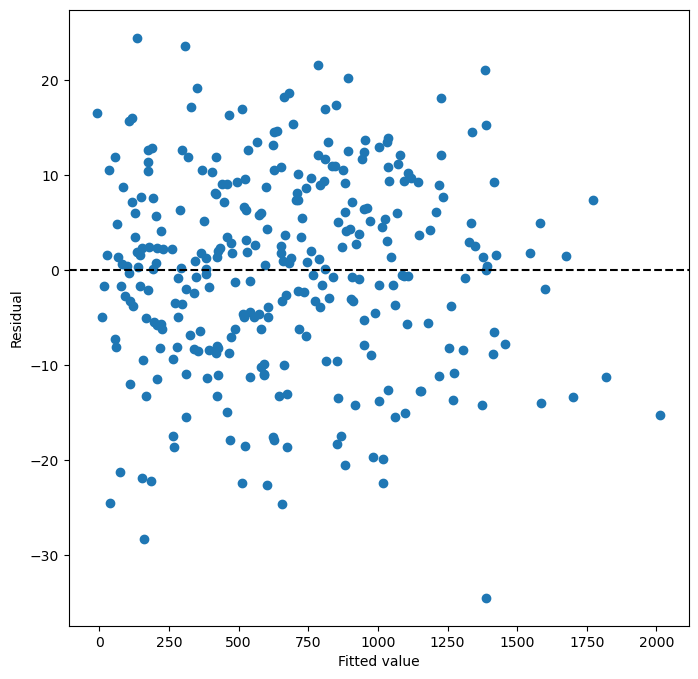

In [81]:
model = ols(f"{y_var} ~ Income + Limit + Cards + Age + Education + Married + Own + Student + Region_South + Region_West", data=credit_df.loc[credit_df['Balance'] > 0])
results = model.fit()
get_residual_fitted_plot(results)
results.summary()